In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o shapefile do PE

In [5]:
gdf = gpd.read_file('Shapes/PE/26SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12498 entries, 0 to 12497
Data columns (total 14 columns):
ID            12498 non-null int64
CD_GEOCODI    12498 non-null object
TIPO          12498 non-null object
CD_GEOCODB    5426 non-null object
NM_BAIRRO     5426 non-null object
CD_GEOCODS    12498 non-null object
NM_SUBDIST    2279 non-null object
CD_GEOCODD    12498 non-null object
NM_DISTRIT    12498 non-null object
CD_GEOCODM    12498 non-null object
NM_MUNICIP    12498 non-null object
NM_MICRO      12498 non-null object
NM_MESO       12498 non-null object
geometry      12498 non-null object
dtypes: int64(1), object(13)
memory usage: 1.3+ MB


In [4]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo  para PE

In [6]:
dados = pd.read_csv('Planilhas/PE/CSV/Basico_PE.csv',sep =';')

In [7]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(12379, 13)

In [8]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,260005405000001,211.0,724.0,"3,43","2,24","452,8","369490,04","764,32","385725,2","322,3","266389,59","693,75","315881,23"
1,260005405000002,223.0,750.0,"3,36","2,11","632,62","260188,28","727,19","230159,08","386,56","229024,17","686,42","200776,62"
2,260005405000003,140.0,417.0,"2,98","2,12","973,5","1573094,48","1117,13","1645327,64","623,45","958614,38","1005,48","1162765,85"
3,260005405000004,318.0,971.0,"3,05","2,07","637,76","396666,92","765,31","378314,62","382,99","295420,17","658,24","326616,9"
4,260005405000005,258.0,890.0,"3,45","2,57","401,38","164913,04","531,05","149248,06","249,22","113465,23","474,34","109166,17"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [9]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [10]:
pe = pd.merge(gdf,dados, on='CD_GEOCODI')

In [11]:
pe.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12379 entries, 0 to 12378
Data columns (total 26 columns):
ID            12379 non-null int64
CD_GEOCODI    12379 non-null int64
TIPO          12379 non-null object
CD_GEOCODB    5368 non-null object
NM_BAIRRO     5368 non-null object
CD_GEOCODS    12379 non-null object
NM_SUBDIST    2258 non-null object
CD_GEOCODD    12379 non-null object
NM_DISTRIT    12379 non-null object
CD_GEOCODM    12379 non-null object
NM_MUNICIP    12379 non-null object
NM_MICRO      12379 non-null object
NM_MESO       12379 non-null object
geometry      12379 non-null object
V001          12360 non-null float64
V002          12360 non-null float64
V003          12360 non-null object
V004          12360 non-null object
V005          12360 non-null object
V006          12360 non-null object
V007          12353 non-null object
V008          12353 non-null object
V009          12379 non-null object
V010          12379 non-null object
V011          12373 no

In [12]:
del gdf
del dados

Text(0.5,1,'PERNAMBUCO - PE')

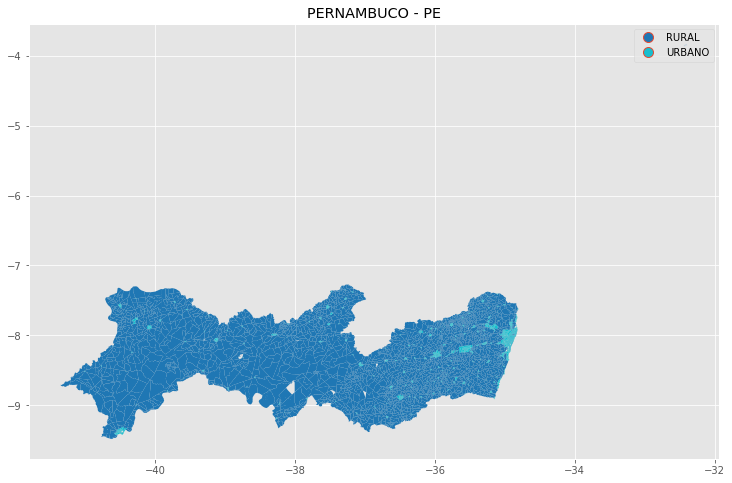

In [14]:
plt.style.use('ggplot')
pe.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title('PERNAMBUCO - PE')

# Utilizando a projeção de Albers para calcular as áreas

In [15]:
pe['AREA'] = pe.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [16]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [17]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [18]:
areas_urbanas_pe_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']=='PE']
del areas_urbanas_br_15

In [19]:
areas_urbanas_pe_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
139,Brejinho,PE,0.728,2602506.0,"POLYGON ((-37.2907490740758 -7.35117188978584,...",0.728338
1374,CaetÃ©s,PE,2.344,2603207.0,(POLYGON ((-36.63800435061491 -8.7691641173679...,2.344225
1407,CalÃ§ado,PE,0.721,2603306.0,POLYGON ((-36.33896081889697 -8.73780274917806...,0.721271
1488,Calumbi,PE,0.462,2603405.0,POLYGON ((-38.15460909448536 -7.94083460171667...,0.462086
1528,Cedro,PE,1.057,2604304.0,POLYGON ((-39.24150151733254 -7.71203978747452...,1.056950


In [20]:
areas_urbanas_pe_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_pe_15['CD_GEOCODM']=areas_urbanas_pe_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_pe_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 178 entries, 139 to 5556
Data columns (total 6 columns):
Municipio     178 non-null object
UF            178 non-null object
Area_Urb      178 non-null float64
CD_GEOCODM    178 non-null int64
geometry      178 non-null object
Area          178 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.7+ KB


In [21]:
pe.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no PE')

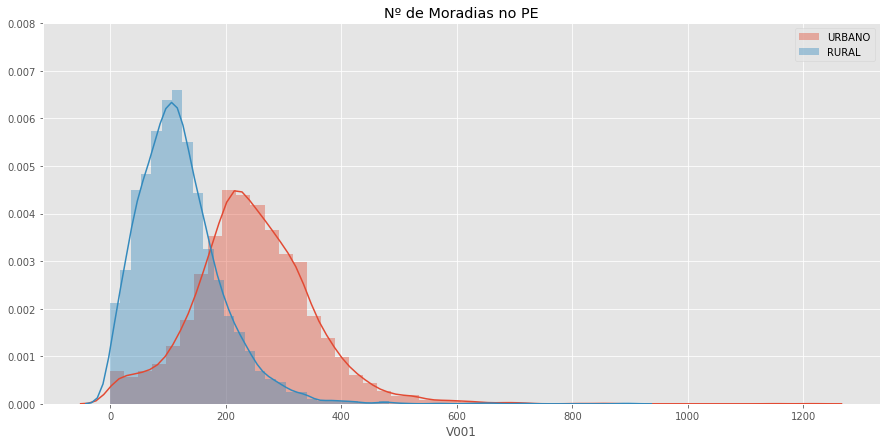

In [22]:
plt.style.use('ggplot')
pe['V001'] = pd.to_numeric(pe['V001'])
pe['V002'] = pd.to_numeric(pe['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(pe[pe['TIPO'] =='URBANO']['V001'])
sns.distplot(pe[pe['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no PE')

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [23]:
print('RURAL','\n',pe[pe['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',pe[pe['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    3986.000000
mean      120.653788
std        73.353786
min         0.000000
25%        71.000000
50%       112.000000
75%       158.000000
max       895.000000
Name: V001, dtype: float64
URBANO 
 count    8393.000000
mean      246.151078
std       103.549727
min         0.000000
25%       184.000000
50%       241.000000
75%       307.000000
max      1215.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

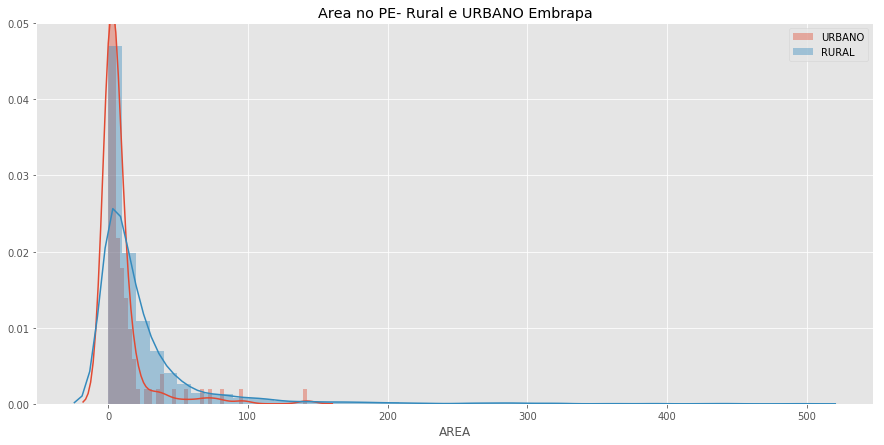

In [24]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_pe_15['Area'])
plt.legend(['URBANO'])
sns.distplot(pe[pe['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no PE- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [25]:
pe['Densidade Moradias'] = pe.V001/pe.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

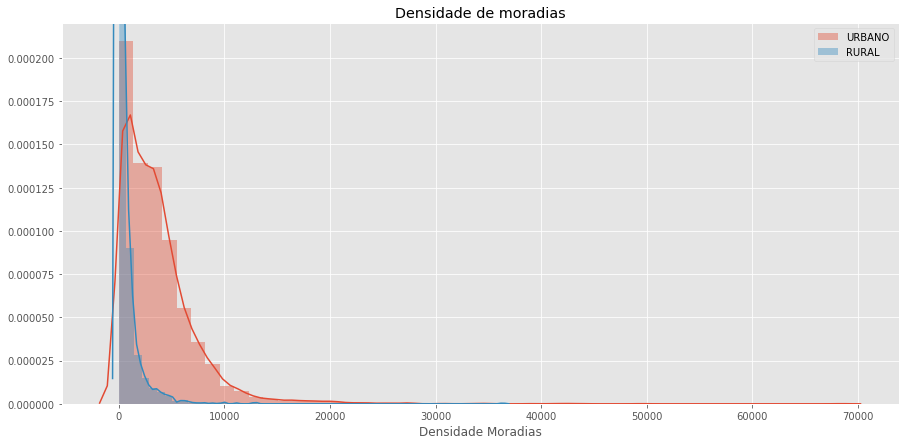

In [26]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(pe[pe['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(pe[pe['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [27]:
print('RURAL','\n',pe[pe['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',pe[pe['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count     3986.000000
mean       302.335640
std       1020.076762
min          0.000000
25%          3.668323
50%          9.504456
75%        164.353936
max      36363.870431
Name: Densidade Moradias, dtype: float64
URBANO 
 count     8393.000000
mean      3638.323416
std       3675.077694
min          0.000000
25%       1132.837246
50%       2900.228192
75%       4941.883999
max      68431.783709
Name: Densidade Moradias, dtype: float64


In [28]:
pe[(pe['TIPO']=='RURAL')&(pe['Densidade Moradias']>pe['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,28456.299107,2.608342e+14,163.946429,600.656250,0.069055,3150.819858
std,3696.445792,4.576317e+11,83.493652,300.687244,0.046747,2941.620710
min,22572.000000,2.600054e+14,15.000000,68.000000,0.003382,1393.692521
25%,25385.750000,2.604106e+14,109.000000,393.750000,0.039000,1745.253541
50%,28563.500000,2.609006e+14,146.500000,545.000000,0.061529,2321.362329
75%,30645.250000,2.611101e+14,205.250000,764.500000,0.084291,3624.793045
max,34979.000000,2.616506e+14,630.000000,2262.000000,0.361177,36363.870431


## Descrição da área por setor censitários urbanos e rurais

In [29]:
print('URBANO','\n',areas_urbanas_pe_15['Area'].describe())
print('RURAL','\n',pe[pe['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    178.000000
mean       8.175005
std       17.106687
min        0.304658
25%        1.433769
50%        2.852695
75%        6.378240
max      142.348006
Name: Area, dtype: float64
RURAL 
 count    3986.000000
mean       23.867003
std        42.154632
min         0.003382
25%         0.495113
50%        11.287068
75%        26.947455
max       496.315936
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

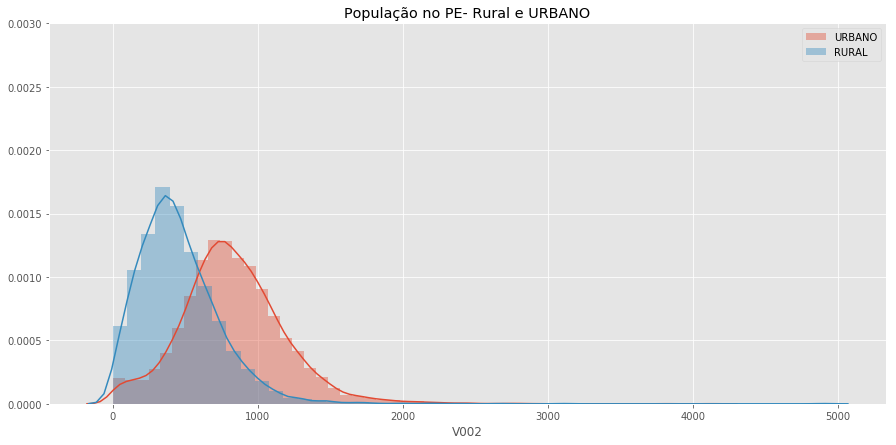

In [30]:
fig = plt.figure(figsize = (15,7))

sns.distplot(pe[pe['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(pe[pe['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no PE- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [31]:
print('RURAL','\n',pe[pe['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',pe[pe['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    3986.000000
mean      457.395384
std       289.124065
min         0.000000
25%       263.000000
50%       416.000000
75%       605.000000
max      4906.000000
Name: V002, dtype: float64
URBANO 
 count    8393.000000
mean      826.248302
std       358.523927
min         0.000000
25%       604.000000
50%       803.000000
75%      1031.000000
max      4128.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [35]:
max_area = areas_urbanas_pe_15['Area'].mean() 
min_pop =  pe[pe['TIPO']=='URBANO']['V002'].mean()
min_mor =  pe[pe['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = pe[pe['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [36]:
scrcu = pe[(pe.TIPO=='RURAL')&(pe.V001 >= min_mor)&(pe.AREA <= max_area)&(pe.V002>= min_pop)\
           &(pe['Densidade Moradias']>= min_densidade_moradias)]

In [37]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,14.000000,1.400000e+01,14.000000,14.000000,14.000000,14.000000
mean,27441.357143,2.607252e+14,294.642857,1022.857143,0.078797,4102.640536
std,3035.734878,4.042074e+11,54.401085,222.961486,0.025524,1757.608187
min,22573.000000,2.600054e+14,249.000000,835.000000,0.028916,2923.134849
25%,25704.250000,2.604731e+14,279.000000,890.250000,0.066429,3383.374218
50%,27903.500000,2.607979e+14,286.500000,933.000000,0.079725,3568.398052
75%,28567.750000,2.609006e+14,288.750000,1070.000000,0.083419,4122.784985
max,34589.000000,2.615805e+14,476.000000,1720.000000,0.145185,9959.729557


Text(0.5,1,'SCRCU - Por Município')

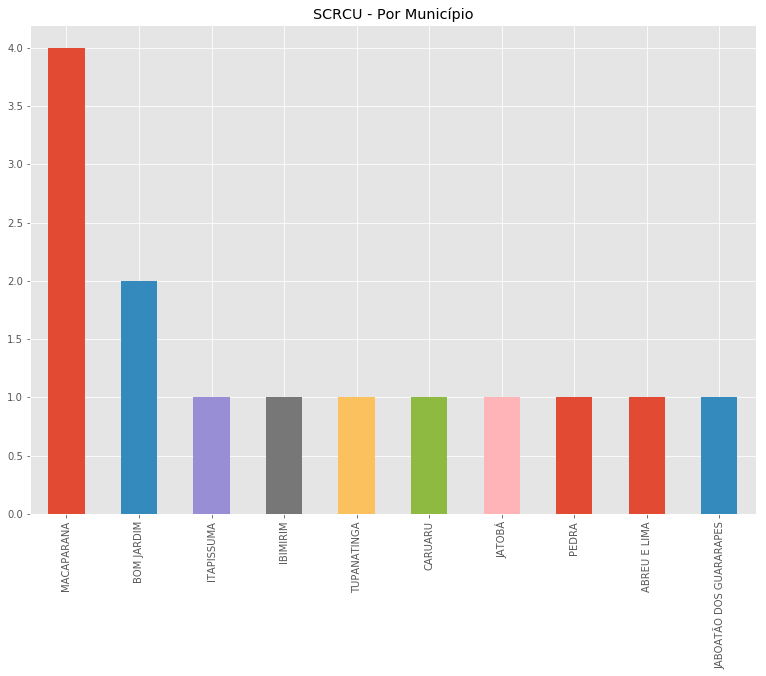

In [38]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado do PE - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


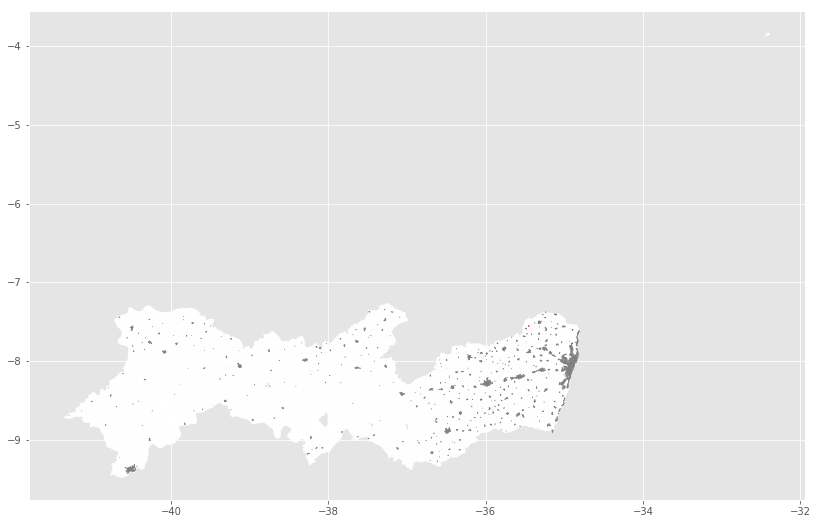

In [39]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
pe.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_pe_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [40]:
areas_urbanas_pe_15.rename(columns={'Area':'AREA'},inplace = True)

In [41]:
fonte = np.zeros(areas_urbanas_pe_15.shape[0])
areas_urbanas_pe_15['FONTE'] = fonte

In [42]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
regioes_urbanas_pe = scrcu[['geometry','FONTE']].append(areas_urbanas_pe_15[['geometry','FONTE']])

In [44]:
regioes_urbanas_pe.head()

,geometry,FONTE
96,POLYGON ((-35.0601516353026 -7.899096136448259...,1.0
1313,POLYGON ((-35.5895093033828 -7.797963224817189...,1.0
1336,POLYGON ((-35.4858332078171 -7.761814494827239...,1.0
2861,"POLYGON ((-36.0573552616871 -8.01169074524096,...",1.0
4166,POLYGON ((-37.6905087395187 -8.536701865899369...,1.0


In [45]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_pe['FONTE'] = regioes_urbanas_pe['FONTE'].apply(fonte) 

In [46]:
regioes_urbanas_pe.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_pe.shp')

In [49]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_pe[regioes_urbanas_pe['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_pe[regioes_urbanas_pe['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_pe.crs)

In [196]:
mplleaflet.show(fig=f,crs=regioes_urbanas_rj.crs)